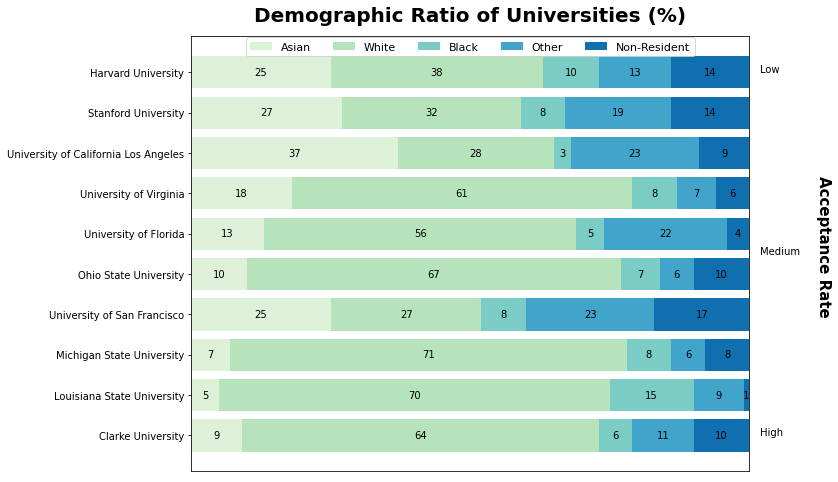

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def loadList(fileName):
    with open(fileName, newline='') as csv_file:
        reader = csv.reader(csv_file)
        dataList = list(reader)
    return dataList

demographic = loadList('Demographic.csv')


#create list
percentList = []

#find the demographic ratio/percentage of each university (the loop makes it repreat for all universites)
for i in range (1, len(demographic)):
    sum = int(demographic[i][1]) + int(demographic[i][2]) + int(demographic[i][3]) + int(demographic[i][4]) + int(demographic[i][5])
    percentList.append([round(int(demographic[i][1])/sum*100), round(int(demographic[i][2])/sum * 100), round(int(demographic[i][3])/sum * 100), round(int(demographic[i][4])/sum * 100),round(int(demographic[i][5])/sum * 100)])  

    


category_names = ['Asian', 'White',
                  'Black', 'Other', 'Non-Resident']
results = {
    'Harvard University': [percentList[0][0], percentList[0][1], percentList[0][2], percentList[0][3], percentList[0][4]],
    'Stanford University': [percentList[1][0], percentList[1][1], percentList[1][2], percentList[1][3], percentList[1][4]],
    'University of California Los Angeles': [percentList[2][0], percentList[2][1], percentList[2][2], percentList[2][3], percentList[2][4]],
    'University of Virginia': [percentList[3][0], percentList[3][1], percentList[3][2], percentList[3][3], percentList[3][4]],
    'University of Florida': [percentList[4][0], percentList[4][1], percentList[4][2], percentList[4][3], percentList[4][4]],
    'Ohio State University': [percentList[5][0], percentList[5][1], percentList[5][2], percentList[5][3], percentList[5][4]],
    'University of San Francisco': [percentList[6][0], percentList[6][1], percentList[6][2], percentList[6][3], percentList[6][4]],
    'Michigan State University': [percentList[7][0], percentList[7][1], percentList[7][2], percentList[7][3], percentList[7][4]],
    'Louisiana State University': [percentList[8][0], percentList[8][1], percentList[8][2], percentList[8][3], percentList[8][4]],
    'Clarke University': [percentList[9][0], percentList[9][1], percentList[9][2], percentList[9][3], percentList[9][4]],
}



def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    #color map "GnBu"
    category_colors = plt.get_cmap('GnBu')(
       
        #when I edit the numbers "0.15" and "0.85" why does it change the colour rather than lin
        np.linspace(0.15, 0.85, data.shape[1]))

   #fig size is responsible for adjusting the (width, height) of the entire graph
    fig, ax = plt.subplots(figsize=(10, 8)) 
    ax.invert_yaxis()  # I flipped the list of universities so it starts with Harvard
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8, label=colname, color=color)#space between each university row
        text_color = 'black'#colour of numbers
        ax.bar_label(rects, label_type='center', color=text_color)
  
        #creates the legend
        ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, 0.976),
              loc='center', fontsize=11)
        
        
    #second y-axis headings
    ax.text(102, 0, 'Low')
    ax.text(102, 4.5, 'Medium')
    ax.text(102, 9, 'High')
    ax.text(112, 6, 'Acceptance Rate', rotation=-90, fontweight='bold', fontsize='15')
   
    return fig, ax
survey(results, category_names)


#title of graph
plt.title("Demographic Ratio of Universities (%)", horizontalalignment='center',
     verticalalignment='top',fontsize='20', fontweight='bold', pad=30)





plt.show()








